#最初の一歩
　最初に練習するためのノートブックです。

　手順に沿ってやってみましょう。

　最終更新日　2019年12月15日

#前処理
　chokozianerとpyvirtualdisplayをインポートします。

　cartpole,pendulum,acrobot,mountaincarに対応しています。

In [1]:
import chokozainerrl
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
%matplotlib inline
thisdir='../../draft/OpenAI/Breakout/result_dqn_choko_ram_draft2'

#学習前を見る
　学習前のCartPoleを見ます。
 Google drive内に　OpenAI/CartPole/result_dqn_chokoフォルダが作られます。

In [2]:
#@title Configuration
args=chokozainerrl.train_ddqn_ram.make_args([])

args.mode = 'check' #@param ["check", "train"]
args.outdir=thisdir #@param{type:"string"}
args.env = "Breakout-ramNoFrameskip-v4" #@param ["Acrobot-v1","Pendulum-v0","CartPole-v0","MountainCar-v0"]{allow-input: true}
args.save_mp4=thisdir+'/pretrain.mp4'#@param{type:"string"}
args.max_frames=2000


##Evaluation
学習済みのデータを用いて、３回試行した結果が表示されます。動画は、outdir+'/pretrain.mp4'に出力されます。

not continuous action spaces
test episode: 0 R: 0.0
test episode: 1 R: 2.0
test episode: 2 R: 0.0


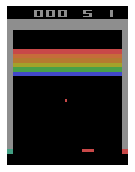

In [3]:
from IPython.display import HTML
anim=chokozainerrl.train_ddqn_ram.main(args)
HTML(anim.to_jshtml())

#学習
DQN (Deep Q Learning)
 
右のテーブルを変更すると、左に反映されます。

In [4]:
#@title Configuration
args=chokozainerrl.train_ddqn_ram.make_args([])

args.mode = 'train' #@param ["check", "train"]
args.outdir=thisdir #@param{type:"string"}
args.env = "Breakout-ramNoFrameskip-v4" #@param ["Acrobot-v1","Pendulum-v0","CartPole-v0","MountainCar-v0"]{allow-input: true}
args.gpu=-1 #@param{type:"integer"}
args.load_agent=None #@param{type:"string"}
args.steps=1000000 #@param{type:"integer"}
args.max_frames=30*60*60 #@param{type:"integer"}

args.step_offset=0 #@param{type:"integer"}
args.checkpoint_freq=100000 #@param{type:"integer"}
args.seed=0 #@param{type:"integer"}
args.final_exploration_steps=10000 #@param{type:"integer"}
args.start_epsilon=1.0 #@param{type:"number"}
args.end_epsilon=0.01 #@param{type:"number"}
args.noisy_net_sigma=None #@param{type:"number"}
args.prioritized_replay=False #@param{type:"boolean"}
args.replay_start_size=1000 #@param{type:"integer"}
args.target_update_interval=100 #@param{type:"integer"}
args.target_update_method='hard' #@param{type:"string"}
args.soft_update_tau=0.01 #@param{type:"number"}
args.update_interval=1 #@param{type:"integer"}
args.eval_n_runs=5 #@param{type:"integer"}
args.eval_interval=100000 #@param{type:"integer"}
args.n_hidden_channels=100 #@param{type:"integer"}
args.n_hidden_layers=2 #@param{type:"integer"}
args.gamma=0.99 #@param{type:"number"}
args.minibatch_size=None #@param{type:"integer"}
args.reward_scale_factor=1.0 #@param{type:"number"}
args.log_type="pbar"#@param["pbar","full_stream"]{allow-input: true}



##Train
訓練開始です。

In [ ]:
chokozainerrl.train_ddqn_ram.main(args)

not continuous action spaces
Start


steps	episodes	elapsed	mean	median	stdev	max	min	average_q	average_loss	n_updates
100018	2686	1932.84	0	0	0	0	0	0.328778	0.00622044	99018
steps	episodes	elapsed	mean	median	stdev	max	min	average_q	average_loss	n_updates
200020	5341	4131.33	0.6	1	0.547723	1	0	0.324161	0.00668909	199020


##Result
学習結果の表です。

In [6]:
chokozainerrl.show_result.table(args.outdir+'/scores.txt')

,steps,episodes,elapsed,mean,median,stdev,max,min,average_q,average_loss,n_updates
0,100250,727,1687.005715,0.0,0.0,0.000000,0.0,0.0,1.312658,0.017112,99250
1,200029,1417,3608.190506,0.0,0.0,0.000000,0.0,0.0,0.467747,0.001493,199029
2,300037,2105,5572.887960,0.0,0.0,0.000000,0.0,0.0,0.283782,0.000520,299037
3,400054,2821,7642.345232,0.0,0.0,0.000000,0.0,0.0,0.395321,0.001272,399054
4,500063,3500,9643.254831,0.4,0.0,0.894427,2.0,0.0,0.360706,0.001462,499063
5,600098,4187,11649.428985,0.0,0.0,0.000000,0.0,0.0,0.370534,0.001708,599098
6,700260,4919,13634.520442,0.6,1.0,0.547723,1.0,0.0,0.378718,0.001938,699260
7,800300,5592,15672.145157,0.4,0.0,0.894427,2.0,0.0,0.369481,0.001238,799300
8,900131,6294,17632.739308,0.0,0.0,0.000000,0.0,0.0,0.325869,0.001214,899131
9,1000000,6950,19601.510944,0.4,0.0,0.894427,2.0,0.0,0.371666,0.001934,999000


学習結果のグラフです。

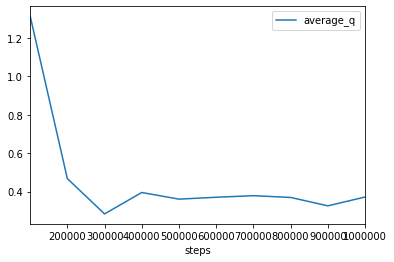

In [7]:
chokozainerrl.show_result.graph(args.outdir+'/scores.txt','steps','average_q')

#学習後の表示

In [8]:
#@title Configuration
args=chokozainerrl.train_ddqn_ram.make_args([])

args.mode = "growth" #@param ["check", "train","growth"]
args.outdir=thisdir #@param{type:"string"}
args.env = "Breakout-ramNoFrameskip-v4" #@param ["Acrobot-v1","Pendulum-v0","CartPole-v0","MountainCar-v0"]{allow-input: true}
args.gpu=-1 #@param{type:"integer"}
args.load_agent=thisdir+"/1000000_finish" #@param{type:"string"}
args.save_mp4=thisdir+'/posttrain.mp4'#@param{type:"string"}


##Evaluation
学習済みのデータを用いて、試行した結果が表示されます。動画は、outdir+'/posttrain.mp4'に出力されます。

Set FireResetEnvAuto
Discrete(4)
Set FireResetEnvAuto
Discrete(4)
agent: 100000_checkpoint R: 0.0
agent: 200000_checkpoint R: 2.0
agent: 300000_checkpoint R: 0.0
agent: 400000_checkpoint R: 0.0
agent: 500000_checkpoint R: 0.0
agent: 600000_checkpoint R: 0.0
agent: 700000_checkpoint R: 0.0
agent: 800000_checkpoint R: 0.0
agent: 900000_checkpoint R: 0.0
agent: 1000000_finish R: 0.0


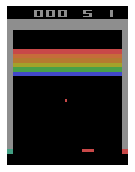

In [9]:
from IPython.display import HTML
anim=chokozainerrl.train_ddqn_ram.main(args)
HTML(anim.to_jshtml())